# Muhammad Ali 00000498148
##Assignment 3 PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the uploaded CSV file into x dataframe
x = pd.read_csv('/content/drive/MyDrive/Fall-24/Machine Learning/Assignment/2. PCA /UK_Eat.csv')

# Display the first few rows of the dataset
x.head()

,Food Item,England,N Ireland,Scotland,Wales
0,Alcoholic drinks,375,135,458,475
1,Beverages,57,47,53,73
2,Carcase meat,245,267,242,227
3,Cereals,1472,1494,1462,1582
4,Cheese,105,66,103,103


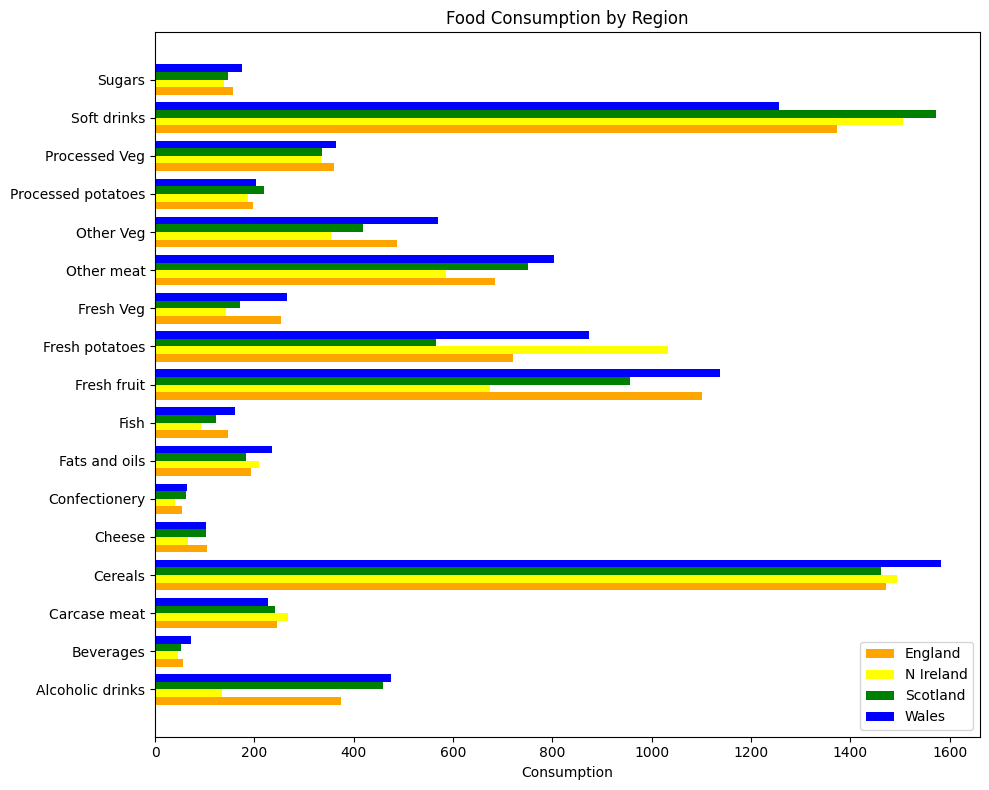

In [ ]:
#Plotting data
import matplotlib.pyplot as plt
import numpy as np


# Set the figure size to make sure everything fits
plt.figure(figsize=(10, 8))

# Regions (columns in the dataframe)
regions = ['England', 'N Ireland', 'Scotland', 'Wales']
colors = ['orange', 'yellow', 'green', 'blue']

# Number of food categories
n_foods = x.shape[0]        # no of foods equals to no. of rows in x
y_positions = np.arange(n_foods)

# Loop through the regions and plot horizontal bars for each region
for i, region in enumerate(regions):
    values = x[region].values
    # Offset bars for different regions to prevent overlap
    plt.barh(y_positions + i * 0.2, values, height=0.2, label=region, color=colors[i])

# Add y-axis labels (food categories)
plt.yticks(y_positions + 0.3, x['Food Item'])

# Add labels and title
plt.xlabel('Consumption')
plt.title('Food Consumption by Region')

# Add legend to distinguish regions
plt.legend(loc='best')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **From the Data we can't say for certain which region is different. PCA can help us**

### Step 1 of PCA algorithm is to do mean normalization of our **data**

In [ ]:
#Preparing the data
X = x.set_index('Food Item').T  # Transpose to make regions the rows and food items the columns

#Mean normalization: Center the data (subtract mean)
X_centered = X - X.mean(axis=0)  # Subtract the mean of each column (axis=0) to center the data

### Step 2 of PCA algorithm is to find covariance matrix of our data

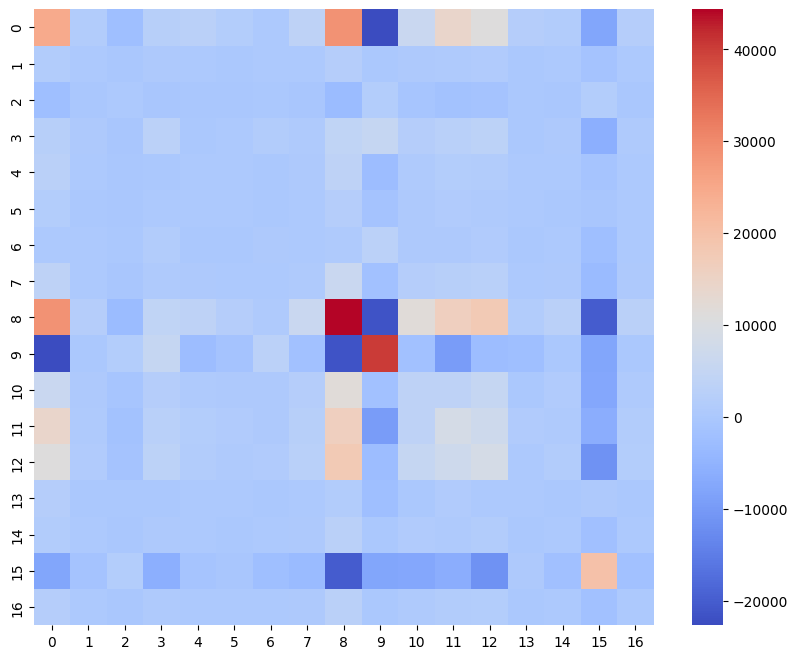

In [ ]:
import seaborn as sns

#Compute the covariance matrix of the centered data
cov_matrix = np.cov(X_centered, rowvar=False)

# Set the figure size to make sure everything fits
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', fmt='.2f')

# Displaying heatmap
plt.show()

### Step 3 of PCA algorithm is to find U,S,V matrix of our covariance matrix

In [ ]:
# Perform SVD on the covariance matrix
U, S, Vt = np.linalg.svd(cov_matrix)  # U: left singular vectors (eigen vectors), S: singular values (eigen values), Vt: right singular vectors

### Step 4 of PCA algorithm is to find U reduced. As we only want 1 PC axis so U reduced will the first column of U

In [ ]:
# U_reduced will be the first column of U (corresponding to the highest eigen vector)
U_reduced = U[:,:1]  # Taking U_reduced as the first principal component (largest eigenvector) as we want to reduce dimensions to 1D

### Step 5 Take dot product of our normalized data with our U reduced to find projection of data on PCA

In [ ]:
# Project the centered data onto the first principal component (PC1)
X_pca = np.dot(X_centered, U_reduced)

# Create a DataFrame for the first principal component projection (PC1)
pca_df = pd.DataFrame(X_pca, index=X.index, columns=['PC1'])

# Printing values of our data's projection on first PC
print(pca_df)

                  PC1
England   -144.993152
N Ireland  477.391639
Scotland   -91.869339
Wales     -240.529148


### Plotting the results

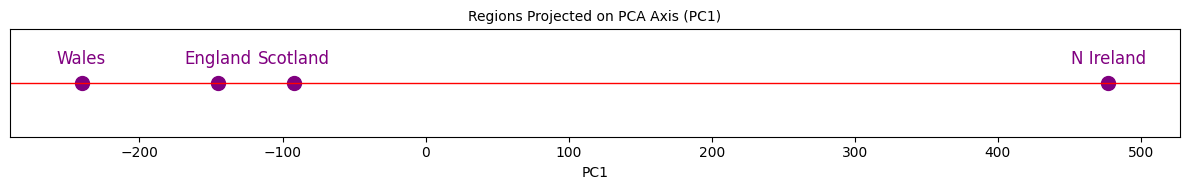

In [ ]:
# Plot the regions along the first principal component axis (PC1)
plt.figure(figsize=(12, 2))

# Plot the regions as points on the PCA axis
plt.scatter(pca_df['PC1'], [0]*len(pca_df), color='purple', s=100)

# Annotate each point with the region name
for region, pc1_value in pca_df['PC1'].items():
    plt.text(pc1_value, 0.02, region, fontsize=12, ha='center', color='purple')

# Add a horizontal line for the PCA axis
plt.axhline(0, color='red', linewidth=1)

# Customize the plot
plt.xlabel('PC1', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks([])  # Remove y-axis ticks
plt.title('Regions Projected on PCA Axis (PC1)', fontsize=10)
plt.grid(False)  # No grid needed for this plot

# Display the plot
plt.tight_layout()
plt.show()


# Now we can say for certian the N Ireland is different than the rest